# **Task 1**

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
#Load wine
wine=load_wine()
X,y=wine.data , wine.target



In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
k_values=[1,3,5,7,9]
accuracy_score=[]
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    accuracy=model.score(X_test,y_test)
    accuracy_score.append(accuracy)


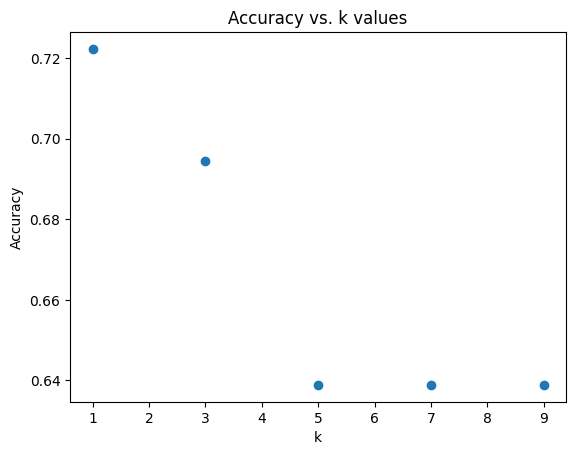

In [10]:
#plot
plt.scatter(k_values, accuracy_score)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k values")
plt.show()



# **KNN with Range**

In [15]:
from sklearn.metrics import accuracy_score
k_values=range(1,30)
accuracy_score1=[]
for k in k_values:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy1=accuracy_score(y_test,y_pred)
    accuracy_score1.append(accuracy1)
best_k=k_values[accuracy_score1.index(max(accuracy_score1))]
print("Best k:",best_k)

Best k: 1


# **Task 2**


In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [17]:
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [18]:
p_values = [1, 2, 3, 4, 5] 
accuracy_scores = []
for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [20]:
print("Accuracy scores of p value:")
for p, accuracy in zip(p_values, accuracy_scores):
    print(f"p={p}: {accuracy:.2f}")
print()


Accuracy scores of p value:
p=1: 0.81
p=2: 0.72
p=3: 0.72
p=4: 0.72
p=5: 0.72



# **Task 3**

In [21]:
#SVM
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


In [22]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("income_evaluation.csv")
df.head(5)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
categorical_features=df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(exclude=['object']).columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
X=df.drop("income_ >50K",axis=1)
y=df["income_ >50K"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)
scaler=StandardScaler()
X_train[numerical_features]=scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features]=scaler.fit_transform(X_test[numerical_features])
display(X_train.head(5))




,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4400,-0.996110,-0.550200,-1.222152,-0.147881,-0.221529,-2.351924,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2598,0.181302,-0.077999,-0.427479,-0.147881,-0.221529,0.791095,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
496,-1.364051,0.666475,-0.030143,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4915,-1.511228,-0.028649,-1.222152,-0.147881,-0.221529,-1.690236,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1341,1.358714,-0.955980,1.559203,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [24]:
svc=SVC(random_state=101)
svc.fit(X_train,y_train)
accuracies=cross_val_score(svc,X_train,y_train,cv=5)
print("Train Score:", np.mean(accuracies))
print("Test Score:", svc.score(X_test,y_test))



Train Score: 0.8461355529131985
Test Score: 0.846958174904943


# **Task 4**

In [25]:
#Voting Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
	estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard'
)
voting_clf.fit(X_train, y_train)

print(voting_clf.predict([X_test.iloc[0]]))




[False]


In [29]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print(f"{clf.__class__.__name__}: {acc:.3f}")

LogisticRegression: 0.844
RandomForestClassifier: 0.839
SVC: 0.847
VotingClassifier: 0.846
